In [38]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix


In [4]:
df = pd.read_csv('analytical_base_table.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [5]:
X = df.drop('Exited', axis=1)
y = df.Exited

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df.Exited)

In [19]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

8000 2000 8000 2000


In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
ann = tf.keras.models.Sequential()

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [30]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5411 - accuracy: 0.7650
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8071
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8151
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8270
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8355
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8436
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8450
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8464
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3643 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8608
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8622
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8624
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8620
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8626
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8616
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8635
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8630
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8631
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 

In [35]:
y_pred = ann.predict(X_test)

In [37]:
y_pred

array([[0.5405835 ],
       [0.41886255],
       [0.27107346],
       ...,
       [0.02392149],
       [0.1532729 ],
       [0.08447161]], dtype=float32)

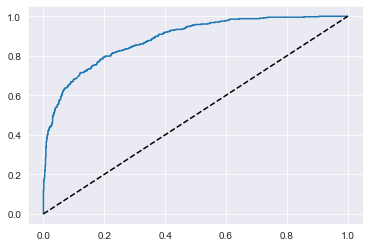

In [40]:
fpr, tpr, treshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='dl')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [51]:
y_pred_class

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
y_pred_class = (y_pred > 0.5).astype(int)
confusion_matrix(y_test, y_pred_class)

array([[1538,   55],
       [ 200,  207]], dtype=int64)

In [47]:
roc_auc_score(y_test, y_pred)

0.8849064781268172

In [41]:
df_roc = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'treshold': treshold
})

In [46]:
pd.set_option('display.max_columns', 100)
df_roc.head(20)

,fpr,tpr,treshold
0,0.000000,0.000000,1.999915
1,0.000000,0.002457,0.999915
2,0.000000,0.115479,0.948306
3,0.000628,0.115479,0.948017
4,0.000628,0.127764,0.944781
5,0.001255,0.127764,0.944369
6,0.001255,0.169533,0.927638
7,0.002511,0.169533,0.921809
8,0.002511,0.176904,0.912463
9,0.003139,0.176904,0.909875
